In [2]:
from model import ResNet18Wrapper
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms as T
import torch
import importlib
import utils; importlib.reload(utils)

# load validation dataset
val_preprocess = T.Compose([
    T.Resize([232, ]),
    T.CenterCrop(224),
    T.PILToTensor(),
    T.ConvertImageDtype(torch.float),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
val_dataset = ImageFolder(root="data/val", transform=val_preprocess)

# load model from best_model.pth
model = ResNet18Wrapper(num_classes=len(val_dataset.classes), pretrained=False)
model.load_state_dict(torch.load('models/ResNet18Wrapper/best_acc_100.00.pth'))

<All keys matched successfully>

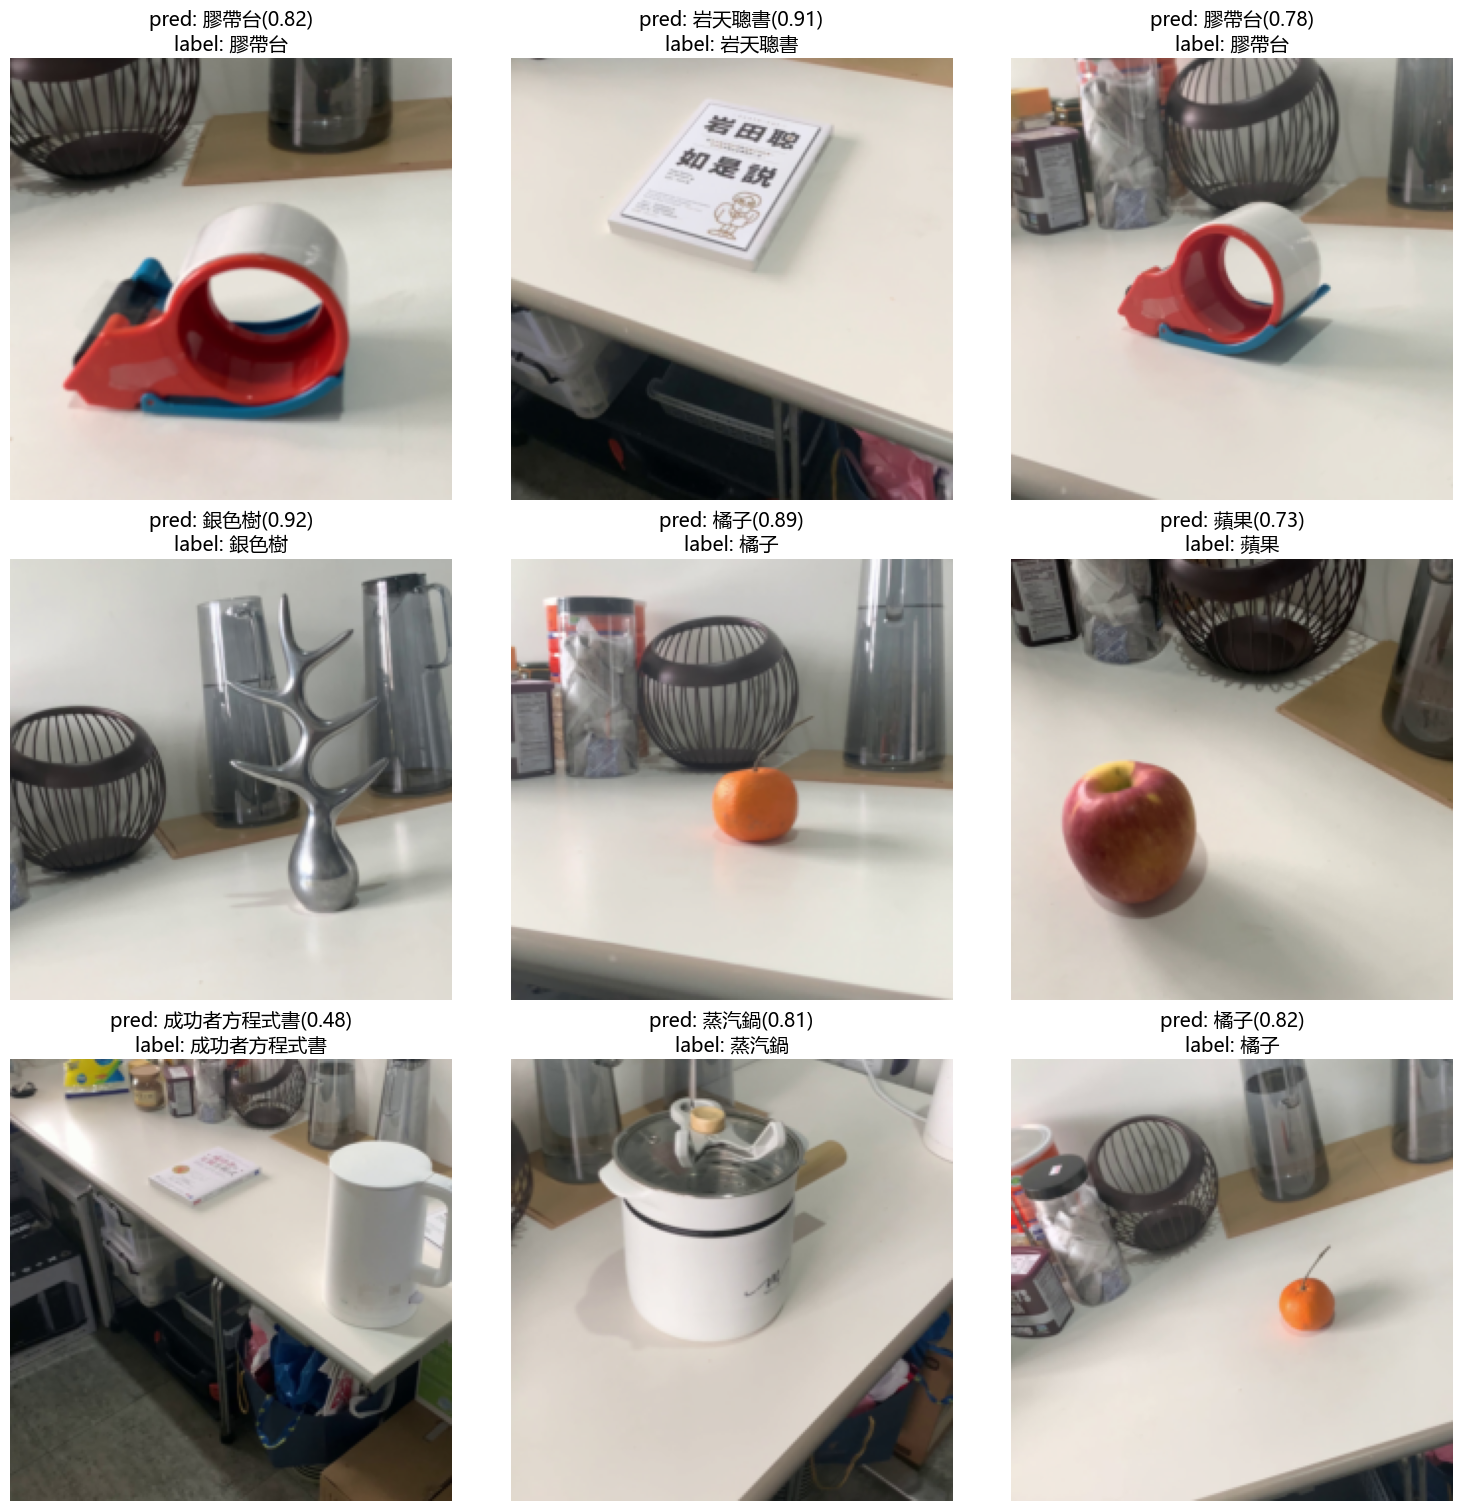

In [4]:
utils.my_plots.random_plot_preds(val_dataset, model, n_example=9, figsize=5)